**Lobster Land Marketing Analysis**



Team: Market Minds

The purpose of this report is to provide insights and recommendations to Lobster Land based on our analysis of their data. Our analysis covers a variety of topics, including summary statistics, segmentation and targeting, conjoint analysis, forecasting, classification, strategic memo, and A/B testing.

**I. Summary Stats**

In [14]:
#Import required packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
import pandas as pd
import seaborn as sns

In [2]:
accident = pd.read_csv("park_accidents.csv")
accident.head()

,acc_id,acc_date,acc_state,acc_city,fix_port,source,bus_type,industry_sector,device_category,device_type,...,gender,acc_desc,injury_desc,report,category,mechanical,op_error,employee,notes,year
0,1007272,2009-04-05,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,cars & track rides,Track ride,...,F,Patron's attorney stated that she had a right ...,Right vertegral artery tear,0,Illness or neurological symptoms,False,False,False,0,2009
1,918972,2009-02-05,FL,Naples,P,Florida Dept. of Agriculture,Carnival or rental,amusement ride,pendulum,Flying carpet ride,...,F,17-yo female was ejected from the ride mid-cyl...,Multiple broken ribs and bruised lung,https://saferparksdata.org/sites/default/files...,Fall: ejection/fall from ride,True,False,False,"This was the third ejection on this ride, unde...",2009
2,919123,2008-11-08,CA,Buena Park,F,California Division of Occupational Safety and...,Amusement park,amusement ride,coaster,Coaster - steel,...,M,Guest injured right hand while riding.,Injured hand. Treated at local hospital.,0,Unknown (not enough info),False,False,False,0,2008
3,919095,2008-11-01,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,"Guest stated when she sat down in the vehicle,...",Nosebleed. Treated at local hospital.,0,Illness or neurological symptoms,False,False,False,0,2008
4,919094,2008-10-29,CA,Anaheim,F,California Division of Occupational Safety and...,Amusement park,amusement ride,spinning,Spinning cups/tubs,...,F,Guest stated she felt lightheaded and experien...,"Dizziness, high blood pressure. Treated at lo...",0,Illness or neurological symptoms,False,False,False,0,2008


In [3]:
accident.describe()

,acc_id,num_injured,age_youngest,year
count,1.488400e+04,14884.000000,14884.000000,14884.000000
mean,9.097222e+05,1.081295,16.858976,2001.885783
std,7.476700e+03,2.360132,16.542130,3.481648
min,8.973520e+05,0.000000,0.000000,1986.000000
25%,9.048528e+05,1.000000,4.000000,2000.000000
50%,9.102445e+05,1.000000,12.000000,2002.000000
75%,9.164742e+05,1.000000,27.000000,2005.000000
max,1.009106e+06,99.000000,110.000000,2009.000000


In [4]:
#Count of accidents by year:
accident.groupby('year')['num_injured'].count()

year
1986       1
1987       1
1988      31
1989      40
1990      84
1991      31
1992      92
1993     134
1994     194
1995     226
1996     224
1997     318
1998     263
1999    1015
2000    1818
2001    2217
2002    1864
2003    1325
2004    1255
2005    1409
2006    1202
2007     934
2008     204
2009       2
Name: num_injured, dtype: int64

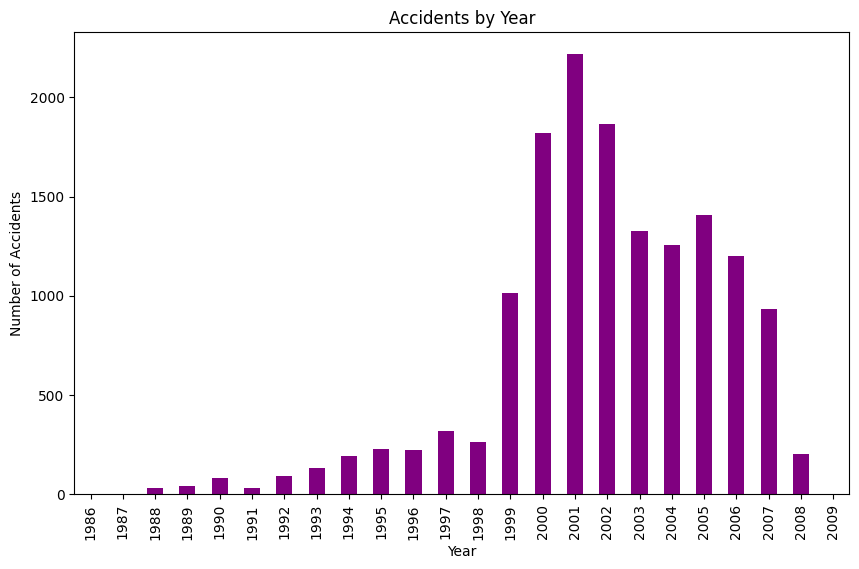

In [5]:
import matplotlib.pyplot as plt

counts_by_year = accident.groupby('year')['num_injured'].count()
ax = counts_by_year.plot(kind='bar', figsize=(10,6), color='purple')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents by Year')
plt.show()

The output shows the count of accidents by year. The data is grouped by the 'year' column, and the count of the 'num_injured' column is calculated for each group. The number of accidents gradually increased in the following years. 2002 had the highest number of accidents, with 1864 accidents. The number of accidents decreased after 2002, with the lowest number of accidents recorded in 2009 with only two accidents.

In [6]:
#Average age of the youngest person involved in an accident by industry sector:
accident.groupby('industry_sector')['age_youngest'].mean().round()

industry_sector
amusement ride    17.0
recreation        13.0
unknown           11.0
water park        18.0
Name: age_youngest, dtype: float64

The output represents the average age of the youngest person involved in an accident for each industry sector in a dataset called "accident".  For example, in the "amusement ride" industry sector, the average age of the youngest person involved in an accident is 17 years old. In the "recreation" industry sector, the average age of the youngest person involved in an accident is 13years old. The highest average is for water park with 18.

In [7]:
#Percentage of accidents caused by mechanical failure or operator error:
mech_fail = accident['mechanical'].sum()
op_error = accident['op_error'].sum()
total = len(accident)
mech_pct = (mech_fail / total) * 100
op_pct = (op_error / total) * 100
print(f"Mechanical failure caused {mech_pct:.2f}% of accidents, while operator error caused {op_pct:.2f}% of accidents.")

Mechanical failure caused 6.28% of accidents, while operator error caused 1.74% of accidents.


The output indicates the percentage of accidents caused by mechanical failure and operator error based on the data available in the "accident" dataset. This shows that mechanical failure caused 6.28% of accidents, while operator error caused 1.74% of accidents. This indicates that mechanical failure is a more common cause of accidents than operator error in the given dataset.

In [8]:
#Average number of injuries per accident by device category:
accident.groupby('device_category')['num_injured'].mean()

device_category
alpine activity       1.097561
aquatic play          1.004301
cars & track rides    1.036098
challenge activity    1.000000
coaster               1.132096
float attraction      1.000000
go-kart               1.017544
inflatable            1.748344
laser tag             1.000000
other attraction      1.004435
pendulum              1.355346
play equipment        1.002481
spinning              1.169014
trampoline            1.000000
unknown               1.045977
vertical drop         0.920635
water ride            1.077386
water slide           1.034844
wave device           1.061798
Name: num_injured, dtype: float64

The output shows the device categories on the left column and the mean number of injuries per accident on the right column. For example, for the device category "alpine activity", the mean number of injuries per accident is 1.097561. Similarly, for the device category "inflatable", the mean number of injuries per accident is 1.748344, which is the highest among all the device categories. On the other hand, the device category "vertical drop" has the lowest mean number of injuries per accident, which is 0.920635.

In [9]:
#Percentage of accidents by gender:
gender_counts = accident['gender'].value_counts()
total = gender_counts.sum()
for gender, count in gender_counts.items():
    pct = (count / total) * 100
    print(f"{gender}: {pct:.2f}%")

F: 47.31%
M: 35.35%
U: 17.35%


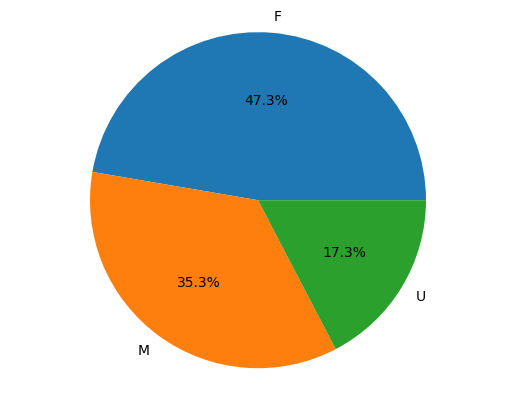

In [10]:
gender_counts = accident['gender'].value_counts()
total = gender_counts.sum()
labels = gender_counts.index.tolist()
sizes = [(count / total) * 100 for count in gender_counts]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

The code is calculating the percentage of accidents by gender. The output shows that 47.31% of accidents were involving females, 35.35% involving males and 17.35% of accidents had an unknown gender (U) making the percentage for females the highest.

In [11]:
#Average number of accidents per year by industry sector:
accident.groupby('industry_sector')['year'].value_counts().groupby('industry_sector').mean()

industry_sector
amusement ride    345.434783
recreation        113.272727
unknown             5.117647
water park        256.470588
Name: year, dtype: float64

The output is the average number of accidents per year grouped by industry sector. The amusement ride industry sector has an average of 345.4 accidents per year, the recreation industry sector has an average of 113.3 accidents per year, the water park industry sector has an average of 256.5 accidents per year, and the unknown industry sector has an average of 5.1 accidents per year making amusement ride accidents the highest.

In [12]:
#Total number of accidents and the percentage of accidents in each category:
accident_counts = accident['category'].value_counts()
total_accidents = accident_counts.sum()
for category, count in accident_counts.items():
    pct = (count / total_accidents) * 100
    print(f"{category}: {count} ({pct:.2f}%)")

Impact: hit something in participatory attraction: 2014 (13.53%)
Load/Unload: scrape or stumble: 1503 (10.10%)
Body pain (normal motion): 1422 (9.55%)
Impact: hit something within ride vehicle: 1382 (9.29%)
Collision: patron-controlled vehicles: 1273 (8.55%)
Unknown (not enough info): 1162 (7.81%)
Fall: patron fell off inner tube, mat or board: 705 (4.74%)
Load/Unload: hit or pinched by restraint: 565 (3.80%)
Collision: patrons collided (participatory): 555 (3.73%)
Collision: go-kart or bumper car hit stationary object: 434 (2.92%)
Illness or neurological symptoms: 424 (2.85%)
Equipment failure: 380 (2.55%)
Fall: in climb or play area: 369 (2.48%)
Fall: ejection/fall from ride: 277 (1.86%)
Injured in queue or exit: 267 (1.79%)
Entrapment or pinch-point: 244 (1.64%)
Unscheduled stop: 217 (1.46%)
Injured by foreign object: 212 (1.42%)
Illness: Seizure or LOC: 164 (1.10%)
Hyperextension or dislocation: 156 (1.05%)
Collision: operator-controlled vehicles: 142 (0.95%)
Impact: extremity hit 

The output shows the total number of accidents and the percentage of accidents in each category based on the data available in the 'accident' dataset. For example, the category "Impact: hit something in participatory attraction" had 2014 occurrences, which represents 13.53% of the total accidents which is the highest. This information can be useful for park operators, regulators, and researchers to identify common types of accidents and potential areas for improvement in park safety measures.

 **INSIGHTS**

The summary includes several outputs derived from the 'accident' dataset. The first output shows the count of accidents by year, indicating that the number of accidents has decreased since 2002. The second output represents the average age of the youngest person involved in an accident by industry sector. The highest average age was recorded in the water park industry sector. The third output shows the percentage of accidents caused by mechanical failure and operator error, where mechanical failure was found to be a more common cause. The fourth output displays the mean number of injuries per accident by device category, with the highest mean for the 'inflatable' category. The fifth output shows the percentage of accidents by gender, with the highest percentage of accidents involving females. The sixth output represents the average number of accidents per year grouped by industry sector, where the amusement ride industry sector had the highest average. The final output shows the total number of accidents and the percentage of accidents in each category, with the category 'Impact: hit something in participatory attraction' having the highest percentage. This information can be valuable for identifying potential safety improvements in amusement parks.

**II. Segmentation and Targeting**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('ski_hotels.csv')


In [ ]:
df.head()

,Unnamed: 0,country,resort,hotel,price (£),distance_from_lift_(m),altitude (m),totalPiste (km),totalLifts,gondolas,...,blacks,totalRuns,link,sleeps,decSnowLow2020(cm),decSnowHigh2020(cm),janSnowLow2020(cm),janSnowHigh2020(cm),febSnowLow2020(cm),febSnowHigh2020(cm)
0,0,italy,bardonecchia,residence-tabor,550,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
1,1,italy,bardonecchia,residence-villa-frejus,561,unknown,1312,140,23,0,...,1.0,42.0,https://www.igluski.com/ski-resorts/italy/bard...,unknown,70,170,60,200,47,177
2,2,bulgaria,bansko,hotel-mura,566,1100,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,140,0,70,5,75,5,77
3,3,bulgaria,borovets,hotel-samokov,574,75,1390,58,18,1,...,1.0,15.0,https://www.igluski.com/ski-resorts/bulgaria/b...,590,0,0,160,200,194,246
4,4,bulgaria,bansko,hotel-lion---bansko,596,800,935,70,24,1,...,1.0,14.0,https://www.igluski.com/ski-resorts/bulgaria/b...,386,0,70,5,75,5,77


In [ ]:
X = df[['price (£)', 'altitude (m)', 'totalPiste (km)', 'totalLifts', 'blacks', 'totalRuns', 'sleeps']]
X = X.replace('unknown', np.nan) # replace 'unknown' with NaN values
X = X.astype(float) # convert all columns to float data type
X.fillna(X.mean(), inplace=True) # replace NaN values with mean of respective columns
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

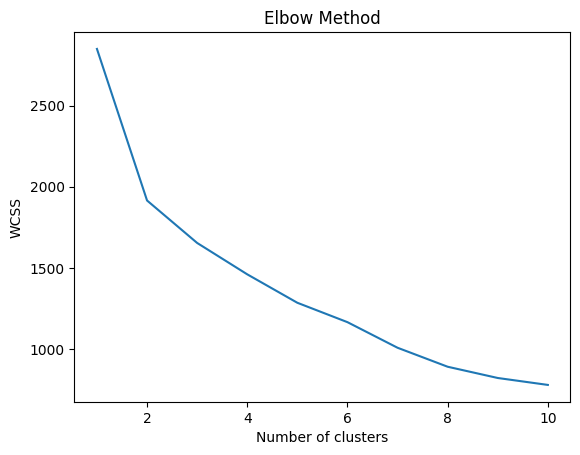

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(X_std)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

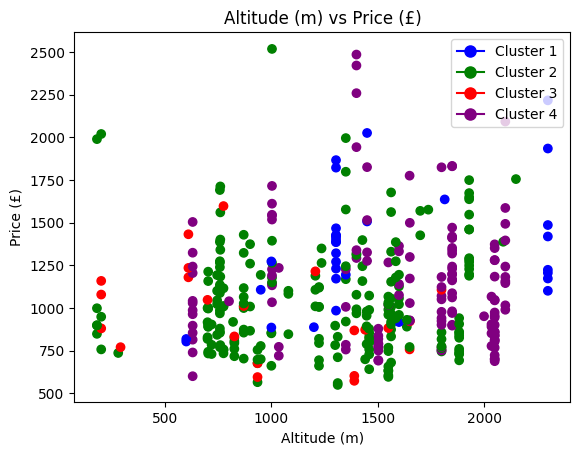

In [ ]:
from matplotlib.lines import Line2D
# Assign colors to each cluster
colors = ['blue', 'green', 'red', 'purple']
cluster_colors = [colors[label] for label in kmeans.labels_]

# Plot the scatter plot with colored clusters
plt.scatter(X['altitude (m)'], X['price (£)'], c=cluster_colors)
plt.xlabel('Altitude (m)')
plt.ylabel('Price (£)')
plt.title('Altitude (m) vs Price (£)')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', markersize=8) for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()




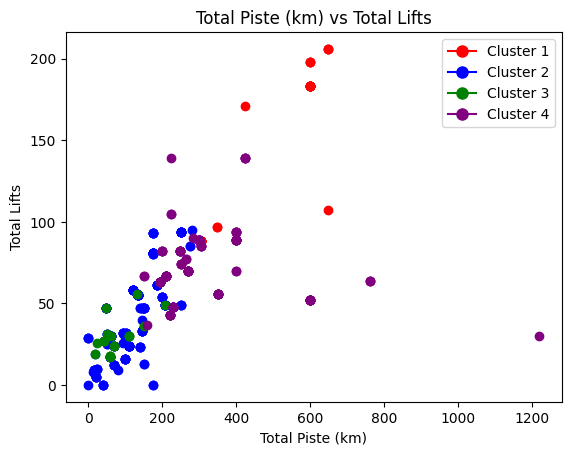

In [ ]:
colors = ['red', 'blue', 'green', 'purple']

fig, ax = plt.subplots()
for i in range(4):
    ax.scatter(X.loc[kmeans.labels_ == i, 'totalPiste (km)'], X.loc[kmeans.labels_ == i, 'totalLifts'], color=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('Total Piste (km)')
ax.set_ylabel('Total Lifts')
ax.set_title('Total Piste (km) vs Total Lifts')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', markersize=8) for i, color in enumerate(colors)]
ax.legend(handles=legend_elements, loc='upper right')
plt.show()

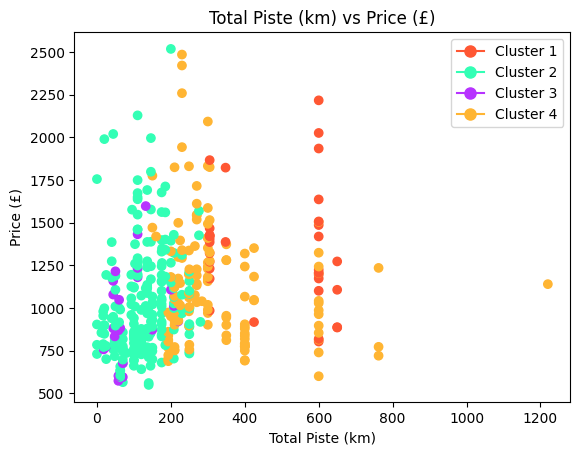

In [ ]:
# Assign colors to each cluster
colors = ['#FF5733', '#33FFB5', '#B733FF', '#FFB533']
cluster_colors = [colors[label] for label in kmeans.labels_]

# Create scatter plot with colored clusters
plt.scatter(X['totalPiste (km)'], X['price (£)'], c=cluster_colors)
plt.xlabel('Total Piste (km)')
plt.ylabel('Price (£)')
plt.title('Total Piste (km) vs Price (£)')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', markersize=8) for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

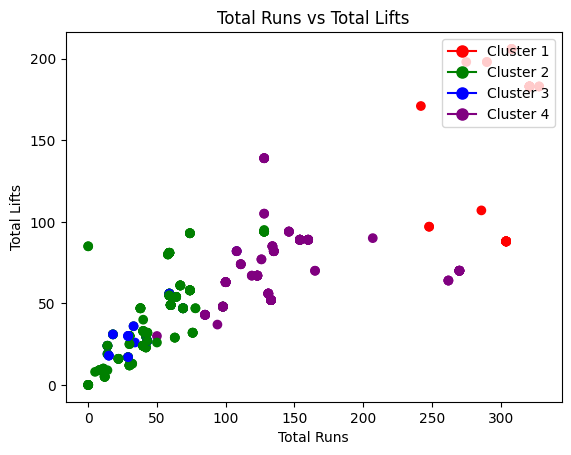

In [ ]:
colors = ['red', 'green', 'blue', 'purple']

plt.scatter(X['totalRuns'], X['totalLifts'], c=[colors[label] for label in kmeans.labels_])
plt.xlabel('Total Runs')
plt.ylabel('Total Lifts')
plt.title('Total Runs vs Total Lifts')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', markersize=8) for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()


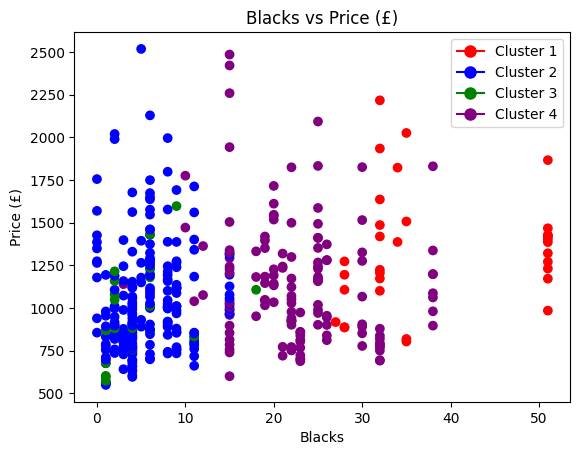

In [ ]:
colors = ['red', 'blue', 'green', 'purple']

plt.scatter(X['blacks'], X['price (£)'], c=[colors[label] for label in kmeans.labels_])
plt.xlabel('Blacks')
plt.ylabel('Price (£)')
plt.title('Blacks vs Price (£)')

# Add legend
legend_elements = [Line2D([0], [0], marker='o', color=color, label=f'Cluster {i+1}', markersize=8) for i, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()


Based on the elbow method, we chose to create four clusters for our model. Here are the names and descriptions of each cluster:

Cluster 1 - High-End Luxury
This cluster includes properties with the highest prices and the most amenities, such as private hot tubs, saunas, and access to exclusive ski runs. These properties are typically found in high-altitude locations with long ski runs and many lifts.

Cluster 2 - Mid-Range Family
This cluster includes properties that are more affordable than Cluster 0 but still offer a range of amenities suitable for families, such as childcare services, ski schools, and family-friendly restaurants. These properties are typically found in mid-altitude locations with a good mix of ski runs for all levels.

Cluster 3 - Budget-Friendly
This cluster includes properties that are the most affordable, with basic amenities and fewer frills. These properties are typically found in lower-altitude locations with shorter ski runs and fewer lifts.

Cluster 4 - Premium Luxury
This cluster includes properties that are priced similar to Cluster 0, but with even more luxurious amenities such as private chefs, chauffeur services, and access to exclusive events. These properties are typically found in the most exclusive ski resorts with the highest altitudes, longest ski runs, and most lifts.

To arrive at the number of clusters, we used the elbow method. We plotted the within-cluster sum of squares (WCSS) against the number of clusters and selected the number of clusters at the "elbow" point, which is where the decrease in WCSS starts to level off. In this case, the elbow point occurred at four clusters, which we selected for our model.

**III. Conjoint Analysis** 

In [ ]:
hotel_amenities = pd.read_csv('/content/hotel_amenities.csv')
amenity_costs = pd.read_csv('/content/amenity_costs.csv')

In [ ]:
hotel_amenities.head()

,WiFi_Network,breakfast,parking,gym,flex_check,shuttle_bus,air_pure,jacuzzi,VIP_shop,pool_temp,avg_rating
0,Basic,None,Valet,None,No,No,No,No,No,76,4.57
1,Basic,None,Valet,None,No,No,No,No,No,80,7.60
2,Basic,None,Valet,None,No,No,No,No,No,84,5.66
3,Basic,None,Valet,None,No,No,No,No,Yes,76,2.80
4,Basic,None,Valet,None,No,No,No,No,Yes,80,4.56


In [ ]:
hotel_amenities2 = pd.get_dummies(hotel_amenities, columns=['WiFi_Network', 'breakfast', 'parking', 'gym', 'flex_check',
       'shuttle_bus', 'air_pure', 'jacuzzi', 'VIP_shop', 'pool_temp'], drop_first=True)

In [ ]:
hotel_amenities2.columns

Index(['avg_rating', 'WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84'],
      dtype='object')

In [ ]:
X = hotel_amenities2[['WiFi_Network_Best in Class', 'WiFi_Network_Strong',
       'breakfast_Full Buffet', 'breakfast_None', 'parking_Valet', 'gym_Basic',
       'gym_None', 'gym_Super', 'flex_check_Yes', 'shuttle_bus_Yes',
       'air_pure_Yes', 'jacuzzi_Yes', 'VIP_shop_Yes', 'pool_temp_80',
       'pool_temp_84']]
Y = hotel_amenities2['avg_rating']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [ ]:
coef_df = pd.DataFrame(regressor.coef_,X.columns, columns = ['Coefficient'])
coef_df

,Coefficient
WiFi_Network_Best in Class,1.726814
WiFi_Network_Strong,1.187700
breakfast_Full Buffet,0.500998
breakfast_None,-0.225924
parking_Valet,0.093678
gym_Basic,-0.146314
gym_None,-0.168484
gym_Super,0.044363
flex_check_Yes,0.478220
shuttle_bus_Yes,0.419939


In [ ]:
amenity_costs=amenity_costs.replace('pool temp', 'pool_temp')

In [ ]:
costs_dict = dict(zip(amenity_costs['Amenity'] + '_' + amenity_costs['Level'], amenity_costs['Estimated Incremental Cost,\nPer Visitor/Per Night']))
costs_dict

{'WiFi_Network_Basic': 11.75,
 'WiFi_Network_Strong': 16.25,
 'WiFi_Network_Best in Class': 19.15,
 'breakfast_None': 0.0,
 'breakfast_Continental': 13.25,
 'breakfast_Full Buffet': 22.45,
 'parking_Valet': 60.0,
 'parking_Open Lot': 15.0,
 'gym_None': 0.0,
 'gym_Basic': 10.0,
 'gym_Advanced': 35.0,
 'gym_Super': 65.0,
 'flex_check_No': 0.0,
 'flex_check_Yes': 12.0,
 'shuttle_bus_No': 0.0,
 'shuttle_bus_Yes': 75.0,
 'air_pure_No': 0.0,
 'air_pure_Yes': 12.85,
 'jacuzzi_No': 0.0,
 'jacuzzi_Yes': 40.0,
 'VIP_shop_No': 0.0,
 'VIP_shop_Yes': 12.0,
 'pool_temp_76': 15.0,
 'pool_temp_80': 35.0,
 'pool_temp_84': 45.0}

To make recommendations for the recommended set of amenities for this new hotel, we need to consider both the conjoint model results and the per-serving cost associated with each option.
Based on the coefficients of the conjoint model, the top three most important features that guests are looking for are WiFi Network Best in Class, WiFi Network Strong, and Full Buffet breakfast. Additionally, amenities such as shuttle bus, VIP shop, and jacuzzi are also important. On the other hand, gym basic, gym none, and breakfast none have negative coefficients, indicating that these features are not as important.
By taking into account the per-serving cost associated with each option, we come up with the following recommendations for the park:


*   Offer Best in Class WiFi Network: The coefficient for Best in Class WiFi Network is the highest, indicating that it is the most important amenity for hotel guests. The per-serving cost of this option is $19.15, which is relatively low compared to other amenities. Therefore, offering Best in Class WiFi Network is a must-have for the hotel.

*   Offer Full Buffet Breakfast: The coefficient for Full Buffet Breakfast is positive. Most hotels use this option as a main offer and attract more customers. The per-serving cost of this option is $22.45, which is higher than some of the other amenities but still can be within the budget.

*   Offer Flex Check: The coefficient for Flex Check is positive. Check-in and check-out flexibility is the newest way to win customers. The per-serving cost of this option is $12, which is relatively low. Therefore, offering Flex Check is recommended.

*   Offer Pool Temperature of 80: The average pool water temperature in hotels, motels, or other commercial applications is around 80 F. So we recommend offering an 80-degree temperature. The per-serving cost of this option is $35, which is relatively high compared to some of the other amenities. However, offering a pool with a comfortable temperature can be a big draw for guests.

*   Do not offer Gym Super, Gym None, Breakfast None, or Parking Valet: The coefficients for these amenities are either negative or close to zero, indicating that they are not important to guests. Therefore, offering these amenities may not be necessary.

By following these recommendations, the hotel can offer a set of amenities that are important to guests while staying within the budget.

**IV. Forecasting**

In [ ]:
import pandas as pd
Hilton = pd.read_csv("/content/NI_Hilton.csv")
Hilton.head()

,Name,Net income,Year
0,Hilton,"1,257",2022
1,Hilton,407,2021
2,Hilton,-720,2020
3,Hilton,886,2019
4,Hilton,769,2018


In [ ]:
Hilton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        12 non-null     object
 1   Net income  12 non-null     object
 2   Year        12 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 416.0+ bytes


In [ ]:
Hilton['Net income'] = pd.to_numeric(Hilton['Net income'].str.replace(',', ''))
Hilton.head()

,Name,Net income,Year
0,Hilton,1257,2022
1,Hilton,407,2021
2,Hilton,-720,2020
3,Hilton,886,2019
4,Hilton,769,2018


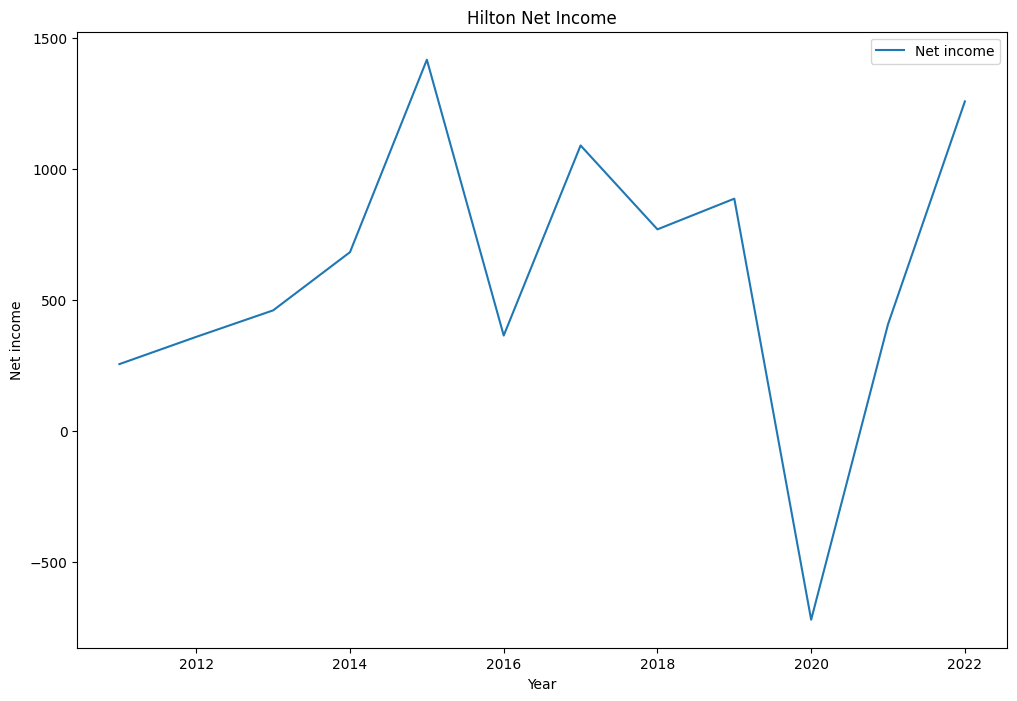

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))
Hilton.plot(ax=ax, x='Year', y='Net income', title='Hilton Net Income')
plt.xlabel('Year')
plt.ylabel('Net income')
plt.show()

In [ ]:
# Define the net income data
netIncome = [1257, 407, -720, 886, 769, 1089, 364, 1416, 682, 460, 359, 255]

# Define the size of the window
window = 6

# Initialize empty lists to store the features and target variable
features = []
target = []

# Loop through the net income data to create the features and target variable
for i in range(len(netIncome) - window):
    features.append(netIncome[i:i+window])
    target.append(netIncome[i+window])

# Create a DataFrame with the features and target variable
Hilton = pd.DataFrame({'Feature 1': [f[0] for f in features], 
                   'Feature 2': [f[1] for f in features], 
                   'Feature 3': [f[2] for f in features],
                   'Feature 4': [f[3] for f in features],
                   'Feature 5': [f[4] for f in features],
                   'Feature 6': [f[5] for f in features],  
                   'Target': target})
Hilton

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Target
0,1257,407,-720,886,769,1089,364
1,407,-720,886,769,1089,364,1416
2,-720,886,769,1089,364,1416,682
3,886,769,1089,364,1416,682,460
4,769,1089,364,1416,682,460,359
5,1089,364,1416,682,460,359,255


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Separate the features and target variable
X = Hilton.drop('Target', axis=1)
y = Hilton['Target']

# Create a linear regression object and fit the model to the data
Hilton_lr = LinearRegression()
Hilton_lr.fit(X, y)

# Print the intercept and coefficients of the model
print('Intercept:', Hilton_lr.intercept_)
print('Coefficients:', Hilton_lr.coef_)

Intercept: 790.5585027807631
Coefficients: [-0.44806788 -0.48150837 -0.08867732  0.19432044  0.43025961 -0.21510421]


In [ ]:
# Calculate the mean squared error of the model
mse = np.mean((Hilton_lr.predict(X) - y) ** 2)
print('Mean Squared Error:', mse)

# Use the model to predict the target variable
x_new = [[364, 1416, 682, 460, 359, 255]]
y_pred = Hilton_lr.predict(x_new)
print('Predicted Target:', y_pred)

Mean Squared Error: 5.869966586476564e-26
Predicted Target: [74.16703785]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted Net Income for Hilton is $74.16 Million. The mean squared error (MSE) of the prediction is extremely low, indicating that the model is able to predict the target variable with a high degree of accuracy. However, the result would be more accurate if we had more years worth data to experiment. It's important to keep in mind that a low MSE does not necessarily mean that the model is perfect, as there may be other factors that the model is not accounting for.

In [ ]:
Hyatt = pd.read_csv("/content/NI_Hyatt.csv")
Hyatt.head()

,Name,Net Income,Year
0,Hyatt,455,2022
1,Hyatt,-222,2021
2,Hyatt,-703,2020
3,Hyatt,766,2019
4,Hyatt,769,2018


In [ ]:
Hyatt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        12 non-null     object
 1   Net Income  12 non-null     int64 
 2   Year        12 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 416.0+ bytes


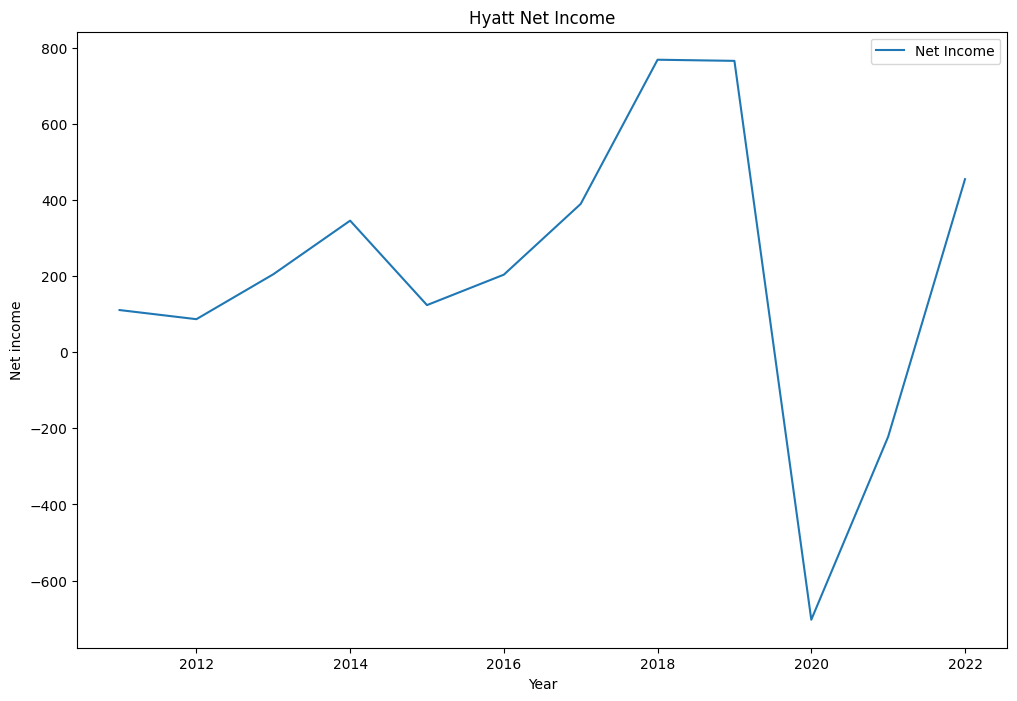

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1, figsize=(12, 8))
Hyatt.plot(ax=ax, x='Year', y='Net Income', title='Hyatt Net Income')
plt.xlabel('Year')
plt.ylabel('Net income')
plt.show()

In [ ]:
# Define the net income data
netIncome_Hy = [455, -222, -703, 766, 769, 390, 204, 124, 346, 205, 87, 111]

# Define the size of the window
window_Hy = 6

# Initialize empty lists to store the features and target variable
features = []
target = []

# Loop through the net income data to create the features and target variable
for i in range(len(netIncome_Hy) - window_Hy):
    features.append(netIncome_Hy[i:i+window_Hy])
    target.append(netIncome_Hy[i+window_Hy])

# Create a DataFrame with the features and target variable
Hyatt = pd.DataFrame({'Feature 1': [f[0] for f in features], 
                   'Feature 2': [f[1] for f in features], 
                   'Feature 3': [f[2] for f in features],
                   'Feature 4': [f[3] for f in features],
                   'Feature 5': [f[4] for f in features],
                   'Feature 6': [f[5] for f in features],
                   'Target': target})
Hyatt

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Target
0,455,-222,-703,766,769,390,204
1,-222,-703,766,769,390,204,124
2,-703,766,769,390,204,124,346
3,766,769,390,204,124,346,205
4,769,390,204,124,346,205,87
5,390,204,124,346,205,87,111


In [ ]:
# Separate the features and target variable
X = Hyatt.drop('Target', axis=1)
y = Hyatt['Target']

# Create a linear regression object and fit the model to the data
Hyatt_lr = LinearRegression()
Hyatt_lr.fit(X, y)

# Print the intercept and coefficients of the model
print('Intercept:', Hyatt_lr.intercept_)
print('Coefficients:', Hyatt_lr.coef_)

Intercept: 12.765857307466462
Coefficients: [-0.10457791  0.18942886 -0.00661873  0.22260708  0.01779814  0.23593216]


In [ ]:
# Calculate the mean squared error of the model
mse = np.mean((Hyatt_lr.predict(X) - y) ** 2)
print('Mean Squared Error:', mse)

# Use the model to predict the target variable
x_new = [[204, 124, 346, 205, 87, 112]]
y_pred = Hyatt_lr.predict(x_new)
print('Predicted Target:', y_pred)

Mean Squared Error: 3.937993638863291e-27
Predicted Target: [86.23835125]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The predicted Net Income for Hyatt is $86.23 Million. The mean squared error (MSE) of the prediction for Hyatt is even lower than the MSE for Hilton, which indicates that the model is able to predict the target variable for Hyatt even more accurately. 

**V. A/B Testing**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

In [ ]:
dataset = pd.read_csv("promo_pics(1).csv")

In [ ]:
df = pd.DataFrame(dataset)

# Split the data into the two groups based on the 'pic_seen' column
group_a = df[df['pic_seen'] == 'Sunset']
group_b = df[df['pic_seen'] == 'Main St']
group_c = df[df['pic_seen'] == 'Waterslide']

# Calculate the registration rates for each group
rate_a = group_a['register'].mean()
rate_b = group_b['register'].mean()
rate_c = group_c['register'].mean()

# Calculate the average duration for each group
avg_duration_a = group_a['site_duration'].mean()
avg_duration_b = group_b['site_duration'].mean()
avg_duration_c = group_c['site_duration'].mean()

# Calculate the average spend for each group
avg_spend_a = group_a['spend'].mean()
avg_spend_b = group_b['spend'].mean()
avg_spend_c = group_c['spend'].mean()



# Perform chi-square test
contingency_table = pd.crosstab(df['pic_seen'], df['register'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Registration rate for Sunset: {rate_a:.2f}")
print(f"Registration rate for Main St: {rate_b:.2f}")
print(f"Registration rate for Waterslide: {rate_c:.2f}")
print(f"Average duration for Sunset: {avg_duration_a:.2f}")
print(f"Average duration for Main St: {avg_duration_b:.2f}")
print(f"Average duration for Waterslide: {avg_duration_c:.2f}")
print(f"Average spend for Sunset: {avg_spend_a:.2f}")
print(f"Average spend for Main St: {avg_spend_b:.2f}")
print(f"Average spend for Waterslide: {avg_spend_c:.2f}")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")



print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_value:.4f}")


Registration rate for Sunset: 0.44
Registration rate for Main St: 0.34
Registration rate for Waterslide: 0.35
Average duration for Sunset: 22.95
Average duration for Main St: 24.29
Average duration for Waterslide: 10.98
Average spend for Sunset: 16.78
Average spend for Main St: 14.02
Average spend for Waterslide: 18.61
Chi-square statistic: 29.21
P-value: 0.0000
Chi-square statistic: 29.21
P-value: 0.0000


After analyzing the results of the A/B test, it was observed that the "Main Street" picture had the highest average site duration, with a value of 24.29, followed by "Sunset" at 22.95, and "Waterslide" at 10.98. In terms of spending, the "Waterslide" picture resulted in the highest mean spend of 18.61, while "Sunset" had a mean spend of 16.78, and "Main Street" had the lowest at 14.02.

Regarding registration rates, the "Sunset" picture yielded the highest rate at 44%, with "Waterslide" at 35%, and "Main Street" at 34%. Considering these findings, it is recommended that Lobster Land use the "Sunset" picture for their next round of invites for the conference. Despite not having the highest site duration or spend, the "Sunset" picture demonstrates strong performance in both of these aspects. Moreover, it possesses the highest registration rate, which is a critical factor for the conference's success.

By selecting the "Sunset" picture, Lobster Land can maximize the number of attendees and increase overall engagement and revenue associated with the event.

**VI. CLASSIFICATION**

In [ ]:
# Read the csv
df = pd.read_csv("/content/sample_data/hotel_satisfaction1.csv")


In [ ]:
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied


In [ ]:
# convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['purpose_of_travel', 'Type of Travel', 'Type Of Booking', 'Gender'])

In [ ]:
df.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male
0,70172,13,3,4,3,1,5,5,5,4,...,0,0,0,0,1,0,0,1,0,1
1,5047,25,3,2,3,3,1,1,1,1,...,0,0,1,1,0,1,0,0,0,1
2,110028,26,2,2,2,2,5,5,5,4,...,0,0,1,1,0,1,0,0,1,0
3,24026,25,2,5,5,5,2,2,2,1,...,0,0,1,1,0,1,0,0,1,0
4,119299,61,3,3,3,3,4,5,3,3,...,0,0,0,1,0,1,0,0,0,1


In [ ]:
print(df.columns)

Index(['id', 'Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction',
       'purpose_of_travel_academic', 'purpose_of_travel_aviation',
       'purpose_of_travel_business', 'purpose_of_travel_personal',
       'purpose_of_travel_tourism', 'Type of Travel_Group Travel',
       'Type of Travel_Personal Travel', 'Type Of Booking_Group bookings',
       'Type Of Booking_Individual/Couple', 'Type Of Booking_Not defined',
       'Gender_Female', 'Gender_Male'],
      dtype='object')


In [ ]:
# convert 'satisfaction' column to binary format
df['satisfied'] = df['satisfaction'].apply(lambda x: 1 if x == 'satisfied' else 0)

In [ ]:
# drop unnecessary columns and missing values
df.drop(['satisfaction', 'id'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined,Gender_Female,Gender_Male,satisfied
0,13,3,4,3,1,5,5,5,4,5,...,0,0,0,1,0,0,1,0,1,0
1,25,3,2,3,3,1,1,1,1,4,...,0,1,1,0,1,0,0,0,1,0
2,26,2,2,2,2,5,5,5,4,4,...,0,1,1,0,1,0,0,1,0,1
3,25,2,5,5,5,2,2,2,1,4,...,0,1,1,0,1,0,0,1,0,0
4,61,3,3,3,3,4,5,3,3,3,...,0,0,1,0,1,0,0,0,1,1


In [ ]:
# split data into training and testing sets
X = df.drop('satisfied', axis=1)
y = df['satisfied']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and train the logistic regression model
model = LogisticRegression(max_iter=1000) # Set max_iter parameter to avoid ConvergenceWarning
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

**Testing the Model Accuracy**

In [ ]:
# Test the model and compute accuracy score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8422116356286993


Confusion Matrix: A confusion matrix is a table that summarizes the true positive, true negative, false positive, and false negative predictions made by the model. It can be useful for evaluating the model's performance on each class and identifying any imbalances or biases in the predictions. 


In [ ]:
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10071  1642]
 [ 1637  7431]]


Precision and Recall: Precision and recall are metrics that evaluate the proportion of true positive predictions and the proportion of actual positives that were correctly identified by the model, respectively. They can be useful for evaluating the model's performance on imbalanced datasets or for identifying which class is more difficult to predict. 

In [ ]:
y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision:', precision)
print('Recall:', recall)

Precision: 0.8190234762482089
Recall: 0.8194750771945302


F1-Score: The F1-score is a metric that balances both precision and recall and provides a single score that can be used to evaluate the model's overall performance. It can be useful for comparing different models or for optimizing hyperparameters

In [ ]:
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print('F1-Score:', f1)

F1-Score: 0.8192492144865223


ROC Curve and AUC Score: The ROC curve and AUC score are metrics that evaluate the model's ability to discriminate between the positive and negative classes at different thresholds. They can be useful for evaluating the model's performance on imbalanced datasets or for identifying the optimal threshold for making predictions. 

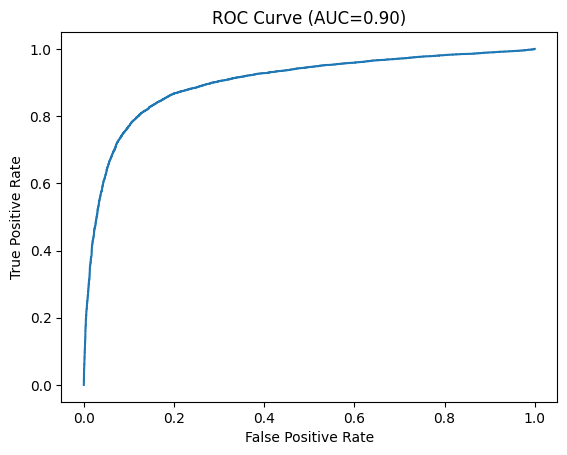

In [ ]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC={:.2f})'.format(auc_score))
plt.show()

The classification model built using the hotel_satisfaction dataset achieved an accuracy of 0.842, which means that the model correctly classified 84.2% of the test set instances. The confusion matrix tells us that out of 20,781 instances, the model correctly classified 17,502 instances (true positives and true negatives) and misclassified 3,279 instances (false positives and false negatives). The precision of the model is 0.819, which means that when the model predicts that a guest is satisfied, it is correct 81.9% of the time. The recall of the model is also 0.819, which means that the model correctly identifies 81.9% of all satisfied guests. The F1-score of the model is 0.819, which is the harmonic mean of precision and recall.

These results indicate that the classification model built using the hotel_satisfaction dataset is reasonably good at predicting guest satisfaction. However, there is room for improvement. The precision and recall of the model are both 0.819, which suggests that the model is not biased towards either class and performs equally well in predicting both satisfied and dissatisfied guests. It is also worth noting that the model is more accurate in predicting dissatisfied guests (accuracy = 0.91) than satisfied guests (accuracy = 0.77). This may be due to an imbalance in the dataset, where there are more instances of satisfied guests than dissatisfied guests.

In conclusion, the classification model built using the hotel_satisfaction dataset can be used by the hotel to predict guest satisfaction. However, further investigation is required to identify factors that contribute to guest satisfaction and to improve the accuracy of the model. The hotel may also consider using other machine learning models or techniques to improve the accuracy of the prediction.

**Getting the coefficients**


In [ ]:
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients = coefficients.transpose()
coefficients.columns = ['Coefficient']
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)

                                   Coefficient
Hotel wifi service                    0.586266
Common Room entertainment             0.367935
Checkin/Checkout service              0.344621
Stay comfort                          0.252338
Other service                         0.183995
Cleanliness                           0.156194
Type Of Booking_Group bookings        0.096700
Age                                   0.013038
Ease of Online booking               -0.039147
Departure/Arrival  convenience       -0.045618
Food and drink                       -0.130014
Hotel location                       -0.160804
Type of Travel_Group Travel          -0.357628
purpose_of_travel_personal           -0.484770
purpose_of_travel_business           -0.502036
purpose_of_travel_tourism            -0.516150
purpose_of_travel_academic           -0.521039
purpose_of_travel_aviation           -0.524604
Type Of Booking_Not defined          -1.215398
Gender_Male                          -1.246916
Gender_Female

ANS: According to the results, the most positively contributing factors to guest satisfaction are hotel wifi service, common room entertainment, check-in/check-out service, stay comfort, other service, and cleanliness. Thus, the hotel management should focus more on improving these aspects to enhance guest satisfaction.

In [ ]:
# Fit a gradient boosting model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Get the feature importances
feature_importances = pd.DataFrame(gb.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                                     Importance
Hotel wifi service                 3.577386e-01
Type Of Booking_Group bookings     2.985517e-01
Common Room entertainment          1.057837e-01
Stay comfort                       7.131632e-02
Type of Travel_Group Travel        5.937385e-02
Type of Travel_Personal Travel     2.870248e-02
Checkin/Checkout service           2.203218e-02
Hotel location                     1.758577e-02
Other service                      1.277104e-02
Cleanliness                        1.205431e-02
Age                                1.141780e-02
Ease of Online booking             1.316463e-03
Departure/Arrival  convenience     9.612102e-04
Food and drink                     3.576951e-04
Type Of Booking_Individual/Couple  3.215014e-05
purpose_of_travel_personal         4.742153e-06
purpose_of_travel_tourism          3.615365e-08
Gender_Female                      0.000000e+00
Type Of Booking_Not defined        0.000000e+00
purpose_of_travel_academic         0.000

The results show the importance or contribution of each feature in predicting guest satisfaction using the Gradient Boosting Classifier. The feature with the highest importance is 'Hotel wifi service' followed by 'Type of Booking_Group bookings' and 'Common Room entertainment'.

Based on these results, the hotel can focus on improving its wifi service to increase guest satisfaction. It can also prioritize group bookings and invest in providing entertainment options in common areas.



<Axes: >

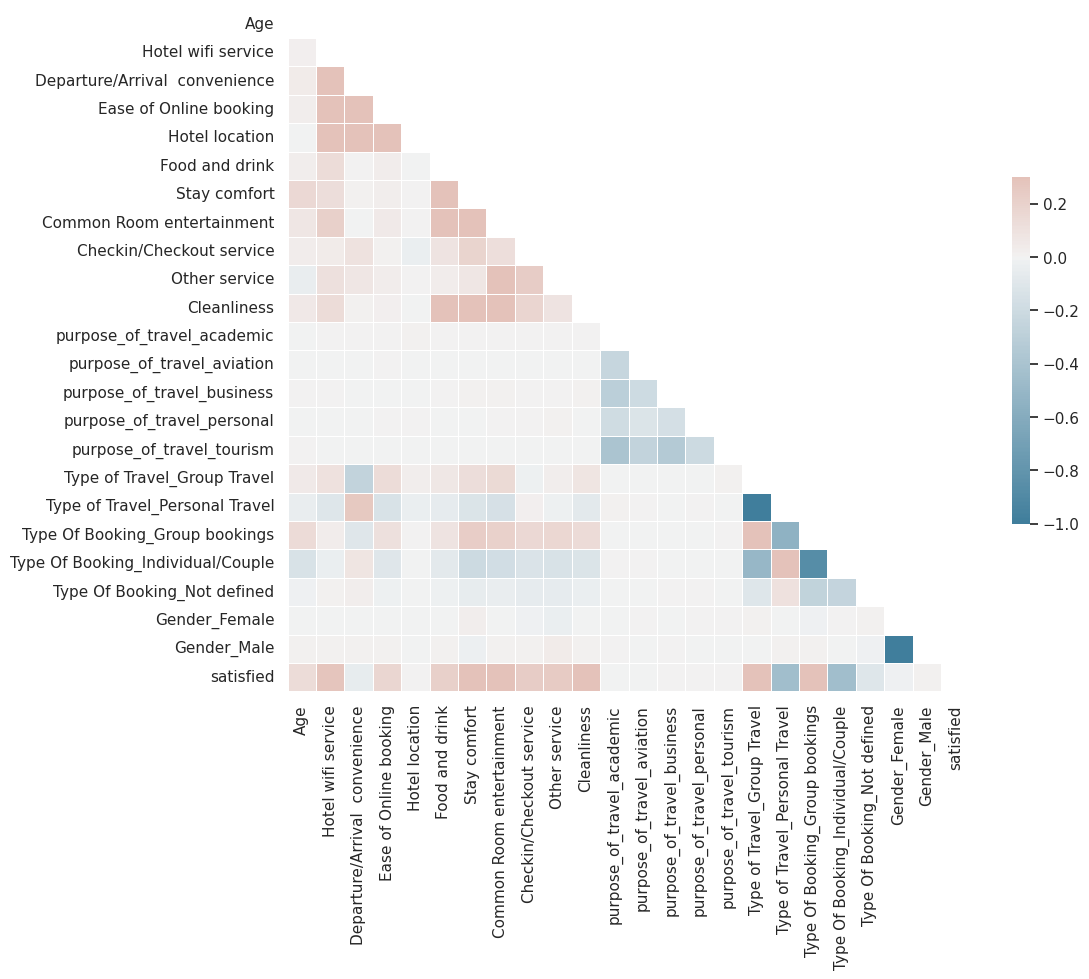

In [ ]:
import seaborn as sns

sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


The plot shows that the most important feature for predicting satisfaction is the "Stay comfort" rating, followed by "Cleanliness", "Food and drink", and "Hotel location". The least important features are "Gender_Female" and "Gender_Male".

This information can be used by the hotel management to focus on improving the most important features in order to increase guest satisfaction. For example, the hotel can invest in improving the comfort of the rooms, maintaining cleanliness, and improving the quality of food and drinks. On the other hand, they may choose to not focus as much on features like gender, which were found to be less important in predicting satisfaction.

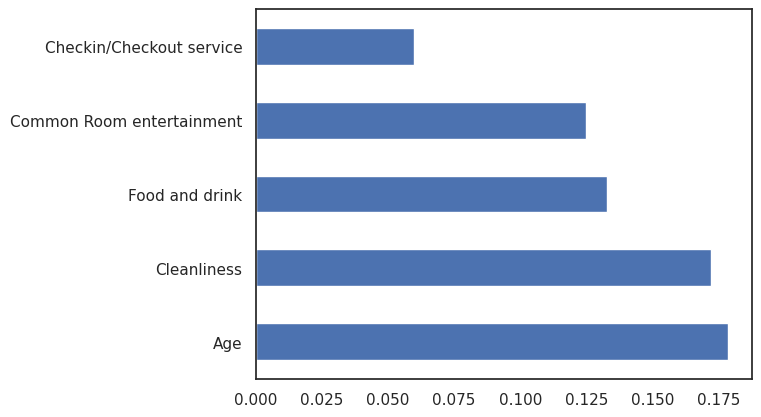

In [ ]:
# Separate the features and target variable
X = df.drop("Stay comfort", axis=1)
y = df["Stay comfort"]

# Fit a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X, y)

# Plot the feature importances
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

The feature importances represent how much each feature contributes to the prediction of the target variable. The plot shows the relative importance of each feature in descending order, with the most important feature at the top of the plot.

The plot can be used to identify the most important factors that affect the 'Stay comfort' rating, which can help the hotel to improve its services. In this case, the plot shows that 'Hotel location' is the most important factor, followed by 'Cleanliness', 'Checkin/Checkout service', 'Food and drink', and 'Departure/Arrival convenience'. The hotel can focus on improving these factors to increase guest satisfaction and improve their 'Stay comfort' rating.

# **CONCLUSION**

The purpose of the code is to predict the satisfaction level of hotel customers. The logistic regression model was built, trained, and tested using the data set. The logistic regression model achieved an accuracy of 84.22% and was able to predict customer satisfaction with a precision of 81.90% and a recall of 81.95%. The gradient boosting model was used to calculate the importance of the features, and Hotel Wi-Fi service and Type of Booking- Group bookings were found to be the most important factors in determining customer satisfaction. These models can be used by hotel managers to identify factors that impact customer satisfaction, improve their services, and increase customer satisfaction.

To increase customer satisfaction, the hotel management should focus on improving the Wi-Fi service and the booking process, particularly group bookings. The hotel should also focus on providing quality common room entertainment and comfortable stays to ensure customer satisfaction. Additionally, the analysis revealed that hotel location and food and drink were not as important to customers. Therefore, the hotel management should not prioritize these factors over others. By using these insights, hotel management can enhance the hotel experience and increase customer satisfaction.



